## This notebook presents, with more details and explanations, the probability distributions covered on the Kinas and Andrade book "Introdução à Análise Bayesiana com R".

## Requirements

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import quad as integral
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

# Discrete Distributions
- Density/Mass: Probability ON the point

- Cumulative: Probability LESS THAN the point

- Quantile: Point with certain probability

- Random Variables: Randomly generated values from a distribution

### Discrete Uniform

Densidade em x=2: 0.16666666666666666 --> 16.67% de chance de sair EXATAMENTE o número 2

Cumulativa em x=3: 0.5 --> 50.0% de chance de sair um número MENOR OU IGUAL a 3

Quantil com P=0.4: 3.0 --> números menores ou iguais a 3 vão sair com 40% de chance

12 Números Aleatórios: [4 6 4 5 3 6 1 5 1 4 4 2] --> resultados em cada um dos 12 testes



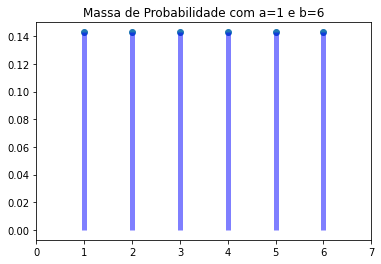

In [ ]:
### Uniforme Discreta de 1 a 6 (problema do dado)

# Definição das variáveis
fig, ax = plt.subplots(1, 1)
dist = stats.randint
a, b, m = 1, 6, 20

# Valores mostrados
densidade = dist.pmf(2, a, b+1, loc=0)
cumulativa = dist.cdf(3, a, b+1, loc=0)
quantil = dist.ppf(0.4, a, b+1, loc=0)
var_aleatoria = dist.rvs(a, b+1, loc=0, size=12, random_state=None)

print('Densidade em x=2:', densidade, f'--> {round(densidade*100, 2)}% de chance de sair EXATAMENTE o número 2')
print('\nCumulativa em x=3:', cumulativa, f'--> {round(cumulativa*100, 2)}% de chance de sair um número MENOR OU IGUAL a 3')
print('\nQuantil com P=0.4:', quantil, f'--> números menores ou iguais a {int(quantil)} vão sair com 40% de chance')
print('\n12 Números Aleatórios:', var_aleatoria, '--> resultados em cada um dos 12 testes\n')

# Valores igualmente espaçados entre os quantis 0,01 e 0,99
x = np.arange(dist.ppf(0.01, a, b+2),
              dist.ppf(0.99, a, b+2))

# Plot da massa de probabilidade
ax.scatter(x, dist.pmf(x, a, b+2))
ax.vlines(x, 0, dist.pmf(x, a, b+2), colors='b', linewidth=5, alpha=0.5)
ax.set_title('Massa de Probabilidade com a=1 e b=6')

plt.xlim([0, 7])
plt.show()

### Binomial / Bernoulli

Densidade em x=2: 0.3176523000000001 --> 31.77% de chance de sair EXATAMENTE 2 fêmeas entre os 7 animais amostrados

Cumulativa em x=2: 0.6470695 --> 64.71% de chance de sair NO MÁXIMO 2 fêmeas entre os 7 animais amostrados

Quantil com P=0.4: 2.0 --> 2 fêmeas vão sair se eu tiver 40% de sucesso

12 Números Aleatórios: [2 1 1 3 0 5 1 2 1 1 1 1] --> quantas fêmeas saíram em cada um dos 12 testes



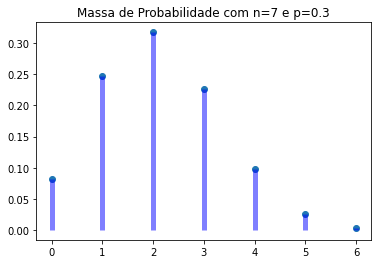

In [ ]:
### Binomial com 7 ensaios (ANIMAIS AMOSTRADOS --> SÓ POSSO TER 7 FÊMEAS A CADA TESTE) e probabilidade de sucesso 0.3 (PROPORÇÃO DE FÊMEAS NA POPULAÇÃO)

# Definição das variáveis
fig, ax = plt.subplots(1, 1)
dist = stats.binom
n, p = 7, 0.3

# Valores mostrados
densidade = dist.pmf(2, n, p, loc=0)
cumulativa = dist.cdf(2, n, p, loc=0)
quantil = dist.ppf(0.4, n, p, loc=0)
var_aleatoria = dist.rvs(n, p, loc=0, size=12, random_state=None)

print('Densidade em x=2:', densidade, f'--> {round(densidade*100, 2)}% de chance de sair EXATAMENTE 2 fêmeas entre os 7 animais amostrados')
print('\nCumulativa em x=2:', cumulativa, f'--> {round(cumulativa*100, 2)}% de chance de sair NO MÁXIMO 2 fêmeas entre os 7 animais amostrados')
print('\nQuantil com P=0.4:', quantil, f'--> {int(quantil)} fêmeas vão sair se eu tiver 40% de sucesso')
print('\n12 Números Aleatórios:', var_aleatoria, '--> quantas fêmeas saíram em cada um dos 12 testes\n')

# Valores igualmente espaçados entre os quantis 0,0001 e 0,9999
x = np.arange(dist.ppf(0.0001, n, p),
              dist.ppf(0.9999, n, p)) # Para Visualizar o plot completo, aumento o alcance das variáveis

# Plot da massa de probabilidade
ax.scatter(x, dist.pmf(x, n, p))
ax.vlines(x, 0, dist.pmf(x, n, p), colors='b', linewidth=5, alpha=0.5)
ax.set_title('Massa de Probabilidade com n=7 e p=0.3')

plt.show()

Densidade em x=1: 0.3 --> 30.0% de chance de sucesso

Cumulativa em x=0: 0.7 --> 70.0% de chance de "pelo menos" fracassar

Quantil com P=0.8: 1.0 --> 1 é o resultado provável com 80% de chance de sucesso

8 Números Aleatórios: [0 1 0 0 0 0 0 0] --> resultados em cada um dos 8 testes



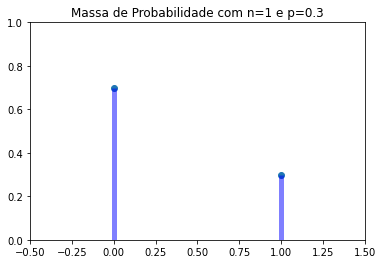

In [ ]:
# Bernoulli (Binomial com valores possíveis 0 e 1) com probabilidade de sucesso 0.3

# Definição das variáveis
fig, ax = plt.subplots(1, 1)
dist = stats.bernoulli
p = 0.3

# Valores mostrados
densidade = dist.pmf(1, p, loc=0)
cumulativa = dist.cdf(0, p, loc=0)
quantil = dist.ppf(0.8, p, loc=0)
var_aleatoria = dist.rvs(p, loc=0, size=8, random_state=None)

print('Densidade em x=1:', densidade, f'--> {round(densidade*100, 2)}% de chance de sucesso')
print('\nCumulativa em x=0:', cumulativa, f'--> {round(cumulativa*100, 2)}% de chance de "pelo menos" fracassar')
print('\nQuantil com P=0.8:', quantil, f'--> {int(quantil)} é o resultado provável com 80% de chance de sucesso')
print('\n8 Números Aleatórios:', var_aleatoria, '--> resultados em cada um dos 8 testes\n')

# Valores igualmente espaçados entre os quantis 0,01 e 0,99
x = np.arange(dist.ppf(0.01, p),
              dist.ppf(0.99, p))

# Plot da massa de probabilidade
ax.scatter([x, 1-x], [dist.pmf(x, p), 1-dist.pmf(x, p)]) # Listas para adicionar a probabilidade em x=1
ax.vlines(x, 0, dist.pmf(x, p), colors='b', linewidth=5, alpha=0.5)
ax.vlines(1-x, 0, 1-dist.pmf(x, p), colors='b', linewidth=5, alpha=0.5) # Adicionando a probabilidade em x=1
ax.set_title('Massa de Probabilidade com n=1 e p=0.3')

plt.xlim([-0.5, 1.5])
plt.ylim([0, 1])
plt.show()

### Hipergeometric

Densidade em x=2: 0.1926398264130003 --> 19.26% de chance de sair EXATAMENTE 2 casos de interesse entre as 10 amostras

Cumulativa em x=3: 0.5596845043661172 --> 55.97% de chance de sair NO MÁXIMO 3 casos de interesse entre as 10 amostras

Quantil com P=0.1: 2.0 --> 2 casos de interesse vão sair se eu tiver 10% de sucesso

12 Números Aleatórios: [1 3 1 3 3 4 4 5 2 5 4 2] --> quantos casos de interesse saíram em cada um dos 12 testes



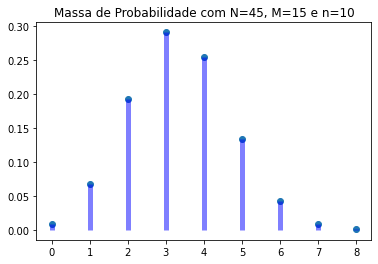

In [ ]:
### Hipergeométrica (Binomial sem reposição) com N=45 (população), M=15 (casos de interesse), n=10 (amostras)

# Definição das variáveis
fig, ax = plt.subplots(1, 1)
dist = stats.hypergeom
N, M, n = 45, 15, 10

# Valores mostrados
densidade = dist.pmf(2, N, M, n, loc=0)
cumulativa = dist.cdf(3, N, M, n, loc=0)
quantil = dist.ppf(0.1, N, M, n, loc=0)
var_aleatoria = dist.rvs(N, M, n, size=12, random_state=None)

print('Densidade em x=2:', densidade, f'--> {round(densidade*100, 2)}% de chance de sair EXATAMENTE 2 casos de interesse entre as 10 amostras')
print('\nCumulativa em x=3:', cumulativa, f'--> {round(cumulativa*100, 2)}% de chance de sair NO MÁXIMO 3 casos de interesse entre as 10 amostras')
print('\nQuantil com P=0.1:', quantil, f'--> {int(quantil)} casos de interesse vão sair se eu tiver 10% de sucesso')
print('\n12 Números Aleatórios:', var_aleatoria, '--> quantos casos de interesse saíram em cada um dos 12 testes\n')

# Valores igualmente espaçados entre os quantis 0,000001 e 0,999999
x = np.arange(dist.ppf(0.000001, N, M, n),
              dist.ppf(0.999999, N, M, n)) # Para Visualizar o plot completo, aumento o alcance das variáveis

# Plot da massa de probabilidade
ax.scatter(x, dist.pmf(x, N, M, n))
ax.vlines(x, 0, dist.pmf(x, N, M, n), colors='b', linewidth=5, alpha=0.5)
ax.set_title('Massa de Probabilidade com N=45, M=15 e n=10')

plt.show()

### Poisson

Densidade em x=2: 0.26778419891897026 --> 26.78% de chance de ocorrência de EXATAMENTE 2 eventos no intervalo

Cumulativa em x=3: 0.8912916052907945 --> 89.13% de chance de ocorrência de NO MÁXIMO 3 eventos no intervalo

Quantil com P=0.1: 0.0 --> 0 eventos vão ocorrer com 10% de chance

8 Números Aleatórios: [0 0 0 3 3 1 0 0] --> quantos eventos ocorreram em cada um dos 8 testes



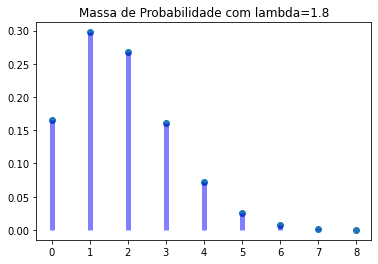

In [ ]:
### Poisson com lambda=1.8

# Definição das variáveis
fig, ax = plt.subplots(1, 1)
dist = stats.poisson
lamb = 1.8

# Valores mostrados
densidade = dist.pmf(2, lamb, loc=0)
cumulativa = dist.cdf(3, lamb, loc=0)
quantil = dist.ppf(0.1, lamb, loc=0)
var_aleatoria = dist.rvs(lamb, size=8, random_state=None)

print('Densidade em x=2:', densidade, f'--> {round(densidade*100, 2)}% de chance de ocorrência de EXATAMENTE 2 eventos no intervalo')
print('\nCumulativa em x=3:', cumulativa, f'--> {round(cumulativa*100, 2)}% de chance de ocorrência de NO MÁXIMO 3 eventos no intervalo')
print('\nQuantil com P=0.1:', quantil, f'--> {int(quantil)} eventos vão ocorrer com 10% de chance')
print('\n8 Números Aleatórios:', var_aleatoria, '--> quantos eventos ocorreram em cada um dos 8 testes\n')

# Valores igualmente espaçados entre os quantis 0,0001 e 0,9999
x = np.arange(dist.ppf(0.0001, lamb),
              dist.ppf(0.9999, lamb)) # Para Visualizar o plot completo, aumento o alcance das variáveis

# Plot da massa de probabilidade
ax.scatter(x, dist.pmf(x, lamb))
ax.vlines(x, 0, dist.pmf(x, lamb), colors='b', linewidth=5, alpha=0.5)
ax.set_title('Massa de Probabilidade com lambda=1.8')

plt.show()

### Negative Binomial / Geometric

Densidade em x=: 0.0687101269925071 --> 6.87% de chance de sair EXATAMENTE 10 fracassos antes do 5º sucesso

Cumulativa em x=2: 0.7624922211223986 --> 76.25% de chance de sair NO MÁXIMO 15 fracassos antes do 5º sucesso

Quantil com P=0.4: 5.0 --> 5 fracassos vão sair antes do 5º sucesso com 10% de chance

8 Números Aleatórios: [ 5  8  8 14  4  4  5  7] --> quantos fracassos antes do 5º sucesso saíram em cada um dos 8 testes



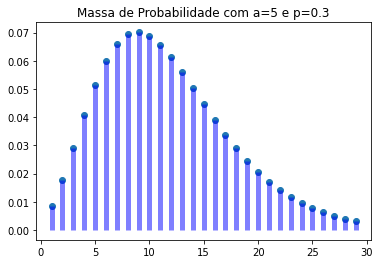

In [ ]:
### Binomial Negativa com 5 sucessos e probabilidade de sucesso 0.3 (EXISTE UMA OUTRA INTERPRETAÇÃO, RELACIONADA COM POISSON, VISTA NO CAPÍTULO 8)

# Definição das variáveis
fig, ax = plt.subplots(1, 1)
dist = stats.nbinom
a, p = 5, 0.3

# Valores mostrados
densidade = dist.pmf(10, a, p, loc=0)
cumulativa = dist.cdf(15, a, p, loc=0)
quantil = dist.ppf(0.1, a, p, loc=0)
var_aleatoria = dist.rvs(a, p, loc=0, size=8, random_state=None)

print('Densidade em x=:', densidade, f'--> {round(densidade*100, 2)}% de chance de sair EXATAMENTE 10 fracassos antes do 5º sucesso')
print('\nCumulativa em x=2:', cumulativa, f'--> {round(cumulativa*100, 2)}% de chance de sair NO MÁXIMO 15 fracassos antes do 5º sucesso')
print('\nQuantil com P=0.1:', quantil, f'--> {int(quantil)} fracassos vão sair antes do 5º sucesso com 10% de chance')
print('\n8 Números Aleatórios:', var_aleatoria, '--> quantos fracassos antes do 5º sucesso saíram em cada um dos 8 testes\n')

# Valores igualmente espaçados entre os quantis 0,01 e 0,99
x = np.arange(dist.ppf(0.01, a, p),
              dist.ppf(0.99, a, p))

# Plot da massa de probabilidade
ax.scatter(x, dist.pmf(x, a, p))
ax.vlines(x, 0, dist.pmf(x, a, p), colors='b', linewidth=5, alpha=0.5)
ax.set_title('Massa de Probabilidade com a=5 e p=0.3')

plt.show()

Densidade em x=10: 0.012106082099999993 --> 1.21% de chance de sair EXATAMENTE 10 fracassos antes de um sucesso

Cumulativa em x=15: 0.995252438490057 --> 99.53% de chance de sair NO MÁXIMO 15 fracassos antes de um sucesso

Quantil com P=0.4: 1.0 --> 1 fracassos vão sair antes de um sucesso com 10% de chance

8 Números Aleatórios: [6 2 1 2 1 5 2 3] --> quantos fracassos antes de um sucesso saíram em cada um dos 8 testes



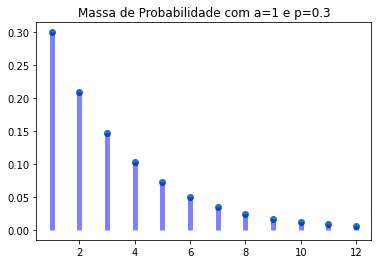

In [ ]:
### Geométrica (Binomial Negativa com 1 sucesso) com probabilidade de sucesso 0.3

# Definição das variáveis
fig, ax = plt.subplots(1, 1)
dist = stats.geom
p = 0.3

# Valores mostrados
densidade = dist.pmf(10, p, loc=0)
cumulativa = dist.cdf(15, p, loc=0)
quantil = dist.ppf(0.1, p, loc=0)
var_aleatoria = dist.rvs(p, loc=0, size=8, random_state=None)

print('Densidade em x=10:', densidade, f'--> {round(densidade*100, 2)}% de chance de sair EXATAMENTE 10 fracassos antes de um sucesso')
print('\nCumulativa em x=15:', cumulativa, f'--> {round(cumulativa*100, 2)}% de chance de sair NO MÁXIMO 15 fracassos antes de um sucesso')
print('\nQuantil com P=0.4:', quantil, f'--> {int(quantil)} fracassos vão sair antes de um sucesso com 10% de chance')
print('\n8 Números Aleatórios:', var_aleatoria, '--> quantos fracassos antes de um sucesso saíram em cada um dos 8 testes\n')

# Valores igualmente espaçados entre os quantis 0,01 e 0,99
x = np.arange(dist.ppf(0.01, p),
              dist.ppf(0.99, p))

# Plot da massa de probabilidade
ax.scatter(x, dist.pmf(x, p))
ax.vlines(x, 0, dist.pmf(x, p), colors='b', linewidth=5, alpha=0.5)
ax.set_title('Massa de Probabilidade com a=1 e p=0.3')

plt.show()

# Continuous Distributions

- Density: it is different from the discrete case: we do not calculate probability values. Continuous density helps identifying higher and lower probability "regions" for each value of a random variable.

- It's not like the probability mass, because when we integrate on the point, the result is 0. When I integrate in regions greater than 0, the result is the same as the CDF.

### Beta

Densidade em x=0.2: 3.5433480192

OBS: Cumulativa no Ponto em x=0.2: 0.0 --> 0.0% de chance de sair EXATAMENTE 0.2

Cumulativa em x=0.2: 0.4416542515200005 --> 44.17% de chance de sair NO MÁXIMO 0.2

Quantil com P=0.15: 0.11433274976898922 --> valor associado a 15% de probabilidade cumulativa, ou seja, 15% de chance de sair NO MÁXIMO 0.11433274976898922

9 Números Aleatórios: [0.11053309 0.06114816 0.21290778 0.19087147 0.32425881 0.23029953
 0.06851174 0.12716867 0.31160279] --> amostras aleatórias da distribuição



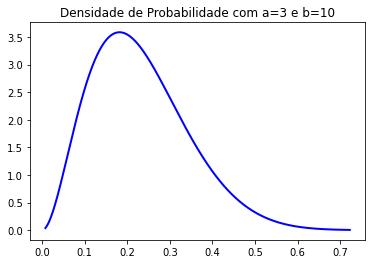

In [ ]:
### Beta com a=3 e b=10

# Definição das variáveis
fig, ax = plt.subplots(1, 1)
dist = stats.beta
a, b = 3, 10

# Função densidade
def pdf(var):
  return dist.pdf(var, a, b, loc=0, scale=1)

# Integral(Função, início, fim)
cumulativa_ponto = integral(pdf, 0.2, 0.2)

# Valores mostrados
densidade = dist.pdf(0.2, a, b, loc=0, scale=1)
cumulativa = dist.cdf(0.2, a, b, loc=0, scale=1)
quantil = dist.ppf(0.15, a, b, loc=0)
var_aleatoria = dist.rvs(a, b, loc=0, size=9, random_state=None)

print('Densidade em x=0.2:', densidade)
print('\nOBS: Cumulativa no Ponto em x=0.2:', cumulativa_ponto[0], f'--> {round(cumulativa_ponto[0]*100, 2)}% de chance de sair EXATAMENTE 0.2')
print('\nCumulativa em x=0.2:', cumulativa, f'--> {round(cumulativa*100, 2)}% de chance de sair NO MÁXIMO 0.2')
print('\nQuantil com P=0.15:', quantil, f'--> valor associado a 15% de probabilidade cumulativa, ou seja, 15% de chance de sair NO MÁXIMO {quantil}')
print('\n9 Números Aleatórios:', var_aleatoria, '--> amostras aleatórias da distribuição\n')

# 1000 Valores igualmente espaçados entre os quantis 0,0001 e 0,9999
x = np.linspace(dist.ppf(0.0001, a, b),
                dist.ppf(0.9999, a, b), 1000) # Para Visualizar o plot completo, aumento o alcance das variáveis

# Plot da densidade de probabilidade
ax.plot(x, dist.pdf(x, a, b), 'b-', lw=2)
ax.set_title('Densidade de Probabilidade com a=3 e b=10')

plt.show()

### Generalized Beta

Densidade em x=2.2: 2.467446405261531

Cumulativa em x=2.2: 0.32257380510092537 --> 32.26% de chance de sair NO MÁXIMO 2.2

Quantil com P=0.15: 2.129092218030155 --> valor associado a 15% de probabilidade cumulativa, ou seja, 15% de chance de sair NO MÁXIMO 2.129092218030155

9 Números Aleatórios: [2.52355416 2.13269618 2.65728979 2.15560913 2.14347307 2.31895176
 2.51126292 2.35436993 2.20165947] --> amostras aleatórias da distribuição



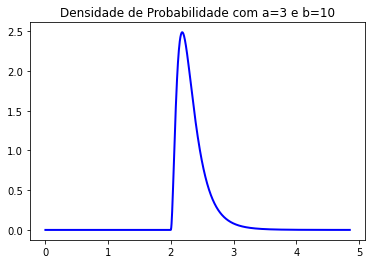

In [ ]:
### Beta Generalizada com a=3 e b=10

# Definição das variáveis
fig, ax = plt.subplots(1, 1)
dist = stats.betaprime
a, b, inicio = 3, 10, 2

# Valores mostrados
densidade = dist.pdf(2.2, a, b, loc=inicio, scale=1)
cumulativa = dist.cdf(2.2, a, b, loc=inicio, scale=1)
quantil = dist.ppf(0.15, a, b, loc=inicio)
var_aleatoria = dist.rvs(a, b, loc=inicio, size=9, random_state=None)

print('Densidade em x=2.2:', densidade)
print('\nCumulativa em x=2.2:', cumulativa, f'--> {round(cumulativa*100, 2)}% de chance de sair NO MÁXIMO 2.2')
print('\nQuantil com P=0.15:', quantil, f'--> valor associado a 15% de probabilidade cumulativa, ou seja, 15% de chance de sair NO MÁXIMO {quantil}')
print('\n9 Números Aleatórios:', var_aleatoria, '--> amostras aleatórias da distribuição\n')

# 1000 Valores igualmente espaçados entre os quantis 0,000001 e 0,999999
x = np.linspace(dist.ppf(0.000001, a, b),
                dist.ppf(0.999999, a, b), 1000) # Para Visualizar o plot completo, aumento o alcance das variáveis

# Plot da densidade de probabilidade
ax.plot(x, dist.pdf(x, a, b, loc=inicio, scale=1), 'b-', lw=2)
ax.set_title('Densidade de Probabilidade com a=3 e b=10')

plt.show()

### Continuous Uniform

Densidade em x=3: 0.25

Cumulativa em x=3.5: 0.375 --> 37.5% de chance de sair um número MENOR OU IGUAL a 3.5

Quantil com P=0.1: 2.4 --> valor associado a 10% de probabilidade cumulativa, ou seja, 10% de chance de sair NO MÁXIMO 2.4

9 Números Aleatórios: [5.99766238 3.7505312  2.05819846 4.57326311 4.47382669 3.09395827
 3.97423248 3.55730944 5.44080998] --> resultados em cada um dos 9 testes



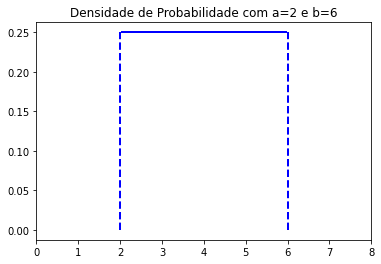

In [ ]:
### Uniforme Contínua de 2 a 6 --> scale = fim-início

# Definição das variáveis
fig, ax = plt.subplots(1, 1)
dist = stats.uniform
a, b, m = 2, 6, 20

# Valores mostrados
densidade = dist.pdf(3, loc=a, scale=b-a)
cumulativa = dist.cdf(3.5, loc=a, scale=b-a)
quantil = dist.ppf(0.1, loc=a, scale=b-a)
var_aleatoria = dist.rvs(loc=a, scale=b-a, size=9, random_state=None)

print('Densidade em x=3:', densidade)
print('\nCumulativa em x=3.5:', cumulativa, f'--> {round(cumulativa*100, 2)}% de chance de sair um número MENOR OU IGUAL a 3.5')
print('\nQuantil com P=0.1:', quantil, f'--> valor associado a 10% de probabilidade cumulativa, ou seja, 10% de chance de sair NO MÁXIMO {quantil}')
print('\n9 Números Aleatórios:', var_aleatoria, '--> resultados em cada um dos 9 testes\n')

# 1000 Valores igualmente espaçados entre os quantis 0,01 e 0,99
x = np.linspace(dist.ppf(0.01, loc=2, scale=b-a),
                dist.ppf(0.99, loc=2, scale=b-a), 1000)

# Plot da densidade de probabilidade
ax.plot(x, dist.pdf(x, loc=a, scale=b-a), 'b-', lw=2)
ax.set_title('Densidade de Probabilidade com a=2 e b=6')
ax.vlines(a, 0, dist.pdf(x, loc=a, scale=b-a), colors='b', linestyles='dashed', linewidth=2, alpha=1) # Para delimitar o limite inferior
ax.vlines(b, 0, dist.pdf(x, loc=a, scale=b-a), colors='b', linestyles='dashed', linewidth=2, alpha=1) # Para delimitar o limite superior

plt.xlim([0, 8]) # Para delimitar o eixo x
plt.show()

### Exponential / Weibull

Densidade em x=2: 0.18393972058572117

Cumulativa em x=3: 0.7768698398515702 --> 77.69% de chance de sair NO MÁXIMO 3

Quantil com P=0.35: 0.8615658321849085 --> valor associado a 35% de probabilidade cumulativa, ou seja, 35% de chance de sair NO MÁXIMO 0.8615658321849085

7 Números Aleatórios: [1.22697089 3.28542    3.30005692 1.94332816 0.08154122 3.32862833
 5.22747867] --> amostras aleatórias da distribuição



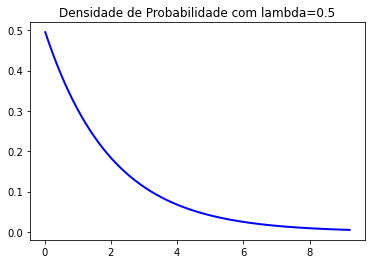

In [ ]:
### Exponencial com lamb=0.5

# Definição das variáveis
fig, ax = plt.subplots(1, 1)
dist = stats.expon
lamb = 0.5

# Valores mostrados
densidade = dist.pdf(2, scale = 1/lamb)
cumulativa = dist.cdf(3, scale = 1/lamb)
quantil = dist.ppf(0.35, scale = 1/lamb)
var_aleatoria = dist.rvs(scale = 1/lamb, size=7, random_state=None)

print('Densidade em x=2:', densidade)
print('\nCumulativa em x=3:', cumulativa, f'--> {round(cumulativa*100, 2)}% de chance de sair NO MÁXIMO 3')
print('\nQuantil com P=0.35:', quantil, f'--> valor associado a 35% de probabilidade cumulativa, ou seja, 35% de chance de sair NO MÁXIMO {quantil}')
print('\n7 Números Aleatórios:', var_aleatoria, '--> amostras aleatórias da distribuição\n')

# 1000 Valores igualmente espaçados entre os quantis 0,01 e 0,99
x = np.linspace(dist.ppf(0.01, scale = 1/lamb),
                dist.ppf(0.99, scale = 1/lamb), 1000)

# Plot da densidade de probabilidade
ax.plot(x, dist.pdf(x, scale = 1/lamb), 'b-', lw=2)
ax.set_title('Densidade de Probabilidade com lambda=0.5')

plt.show()

Densidade em x=2: 0.0040255515348301425

Cumulativa em x=3: 0.9999999999981205 --> 100.0% de chance de sair NO MÁXIMO 3

Quantil com P=0.35: 0.7552420410717573 --> valor associado a 35% de probabilidade cumulativa, ou seja, 35% de chance de sair NO MÁXIMO 0.7552420410717573

7 Números Aleatórios: [1.53045385 1.0448425  0.97140535 0.46921386 0.46602061 1.09398947
 0.7597971 ] --> amostras aleatórias da distribuição



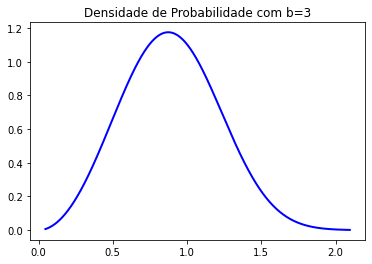

In [ ]:
### Weibull com b=3

# Definição das variáveis
fig, ax = plt.subplots(1, 1)
dist = stats.weibull_min
b = 3

# Valores mostrados
densidade = dist.pdf(2, b)
cumulativa = dist.cdf(3, b)
quantil = dist.ppf(0.35, b)
var_aleatoria = dist.rvs(b, size=7, random_state=None)

print('Densidade em x=2:', densidade)
print('\nCumulativa em x=3:', cumulativa, f'--> {round(cumulativa*100, 2)}% de chance de sair NO MÁXIMO 3')
print('\nQuantil com P=0.35:', quantil, f'--> valor associado a 35% de probabilidade cumulativa, ou seja, 35% de chance de sair NO MÁXIMO {quantil}')
print('\n7 Números Aleatórios:', var_aleatoria, '--> amostras aleatórias da distribuição\n')

# 1000 Valores igualmente espaçados entre os quantis 0,0001 e 0,9999
x = np.linspace(dist.ppf(0.0001, b),
                dist.ppf(0.9999, b), 1000) # Para Visualizar o plot completo, aumento o alcance das variáveis

# Plot da densidade de probabilidade
ax.plot(x, dist.pdf(x, b), 'b-', lw=2)
ax.set_title('Densidade de Probabilidade com b=3')

plt.show()

### Gamma / Chi-Square

Densidade em x=5: 0.03368973499542734

Cumulativa em x=4: 0.9084218055563291 --> 90.84% de chance de sair NO MÁXIMO 4

Quantil com P=0.15: 0.6832386130709405 --> valor associado a 15% de probabilidade cumulativa, ou seja, 15% de chance de sair NO MÁXIMO 0.6832386130709405

8 Números Aleatórios: [2.18586739 1.53805343 2.44733939 0.56165154 1.19774809 0.46755328
 2.84066107 1.93018142] --> amostras aleatórias da distribuição



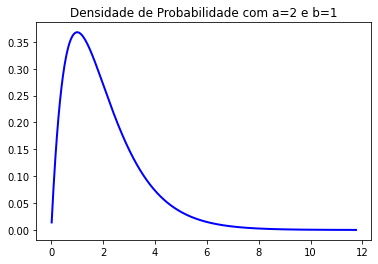

In [ ]:
### Gama com a=2 e b=1 --> scale = 1/b

# Definição das variáveis
fig, ax = plt.subplots(1, 1)
dist = stats.gamma
a, b = 2, 1

# Valores mostrados
densidade = dist.pdf(5, a, scale=1/b)
cumulativa = dist.cdf(4, a, scale=1/b)
quantil = dist.ppf(0.15, a, scale=1/b)
var_aleatoria = dist.rvs(a, scale=1/b, size=8, random_state=None)

print('Densidade em x=5:', densidade)
print('\nCumulativa em x=4:', cumulativa, f'--> {round(cumulativa*100, 2)}% de chance de sair NO MÁXIMO 4')
print('\nQuantil com P=0.15:', quantil, f'--> valor associado a 15% de probabilidade cumulativa, ou seja, 15% de chance de sair NO MÁXIMO {quantil}')
print('\n8 Números Aleatórios:', var_aleatoria, '--> amostras aleatórias da distribuição\n')

# 1000 Valores igualmente espaçados entre os quantis 0,0001 e 0,9999
x = np.linspace(dist.ppf(0.0001, a, scale=1/b),
                dist.ppf(0.9999, a, scale=1/b), 1000) # Para Visualizar o plot completo, aumento o alcance das variáveis

# Plot da densidade de probabilidade
ax.plot(x, dist.pdf(x, a, scale=1/b), 'b-', lw=2)
ax.set_title('Densidade de Probabilidade com a=2 e b=1')

plt.show()

Densidade em x=57: 0.03594807666014744

Cumulativa em x=54: 0.48715029404536914 --> 48.72% de chance de sair NO MÁXIMO 54

Quantil com P=0.15: 44.24482877551376 --> valor associado a 15% de probabilidade cumulativa, ou seja, 15% de chance de sair NO MÁXIMO 44.24482877551376

8 Números Aleatórios: [79.48819111 31.53618928 43.90036981 54.50092192 51.22215694 68.89350106
 49.15852073 55.44046586] --> amostras aleatórias da distribuição



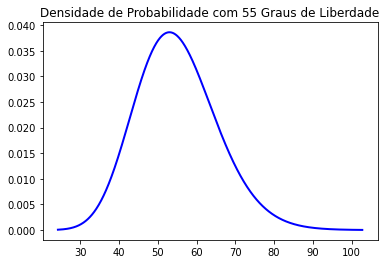

In [ ]:
### Qui-Quadrado com 55 Graus de Liberdade --> a=g/2 e b=1/2 (scale=2)

# Definição das variáveis
fig, ax = plt.subplots(1, 1)
dist = stats.chi2
g = 55

# Valores mostrados
densidade = dist.pdf(57, g)
cumulativa = dist.cdf(54, g)
quantil = dist.ppf(0.15, g)
var_aleatoria = dist.rvs(g, size=8, random_state=None)

print('Densidade em x=57:', densidade)
print('\nCumulativa em x=54:', cumulativa, f'--> {round(cumulativa*100, 2)}% de chance de sair NO MÁXIMO 54')
print('\nQuantil com P=0.15:', quantil, f'--> valor associado a 15% de probabilidade cumulativa, ou seja, 15% de chance de sair NO MÁXIMO {quantil}')
print('\n8 Números Aleatórios:', var_aleatoria, '--> amostras aleatórias da distribuição\n')

# 1000 Valores igualmente espaçados entre os quantis 0,0001 e 0,9999
x = np.linspace(dist.ppf(0.0001, g),
                dist.ppf(0.9999, g), 1000) # Para Visualizar o plot completo, aumento o alcance das variáveis

# Plot da densidade de probabilidade
ax.plot(x, dist.pdf(x, g), 'b-', lw=2)
ax.set_title('Densidade de Probabilidade com 55 Graus de Liberdade')

plt.show()

### Inverse Gamma

Densidade em x=5: 0.0065498460246238566

Cumulativa em x=4: 0.9735009788392561 --> 97.35% de chance de sair NO MÁXIMO 4

Quantil com P=0.15: 0.29652107740633593 --> valor associado a 15% de probabilidade cumulativa, ou seja, 15% de chance de sair NO MÁXIMO 0.29652107740633593

8 Números Aleatórios: [0.36739981 1.53121177 0.70978491 0.16298927 2.45192429 0.6241934
 0.96047186 0.30028197] --> amostras aleatórias da distribuição



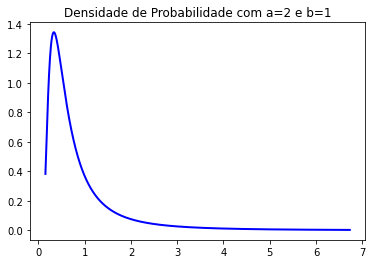

In [ ]:
### Gama Inversa com a=2 e b=1 --> scale = 1/b

# Definição das variáveis
fig, ax = plt.subplots(1, 1)
dist = stats.invgamma
a, b = 2, 1

# Valores mostrados
densidade = dist.pdf(5, a, scale=1/b)
cumulativa = dist.cdf(4, a, scale=1/b)
quantil = dist.ppf(0.15, a, scale=1/b)
var_aleatoria = dist.rvs(a, scale=1/b, size=8, random_state=None)

print('Densidade em x=5:', densidade)
print('\nCumulativa em x=4:', cumulativa, f'--> {round(cumulativa*100, 2)}% de chance de sair NO MÁXIMO 4')
print('\nQuantil com P=0.15:', quantil, f'--> valor associado a 15% de probabilidade cumulativa, ou seja, 15% de chance de sair NO MÁXIMO {quantil}')
print('\n8 Números Aleatórios:', var_aleatoria, '--> amostras aleatórias da distribuição\n')

# 1000 Valores igualmente espaçados entre os quantis 0,01 e 0,99
x = np.linspace(dist.ppf(0.01, a, scale=1/b),
                dist.ppf(0.99, a, scale=1/b), 1000)

# Plot da densidade de probabilidade
ax.plot(x, dist.pdf(x, a, scale=1/b), 'b-', lw=2)
ax.set_title('Densidade de Probabilidade com a=2 e b=1')

plt.show()

### Normal

Densidade em x=2: 0.05399096651318806

Cumulativa em x=2: 0.9772498680518208 --> 97.72% de chance de sair NO MÁXIMO 2

Quantil com P=0.15: -1.0364333894937898 --> valor associado a 15% de probabilidade cumulativa, ou seja, 15% de chance de sair NO MÁXIMO -1.0364333894937898

8 Números Aleatórios: [-0.6961912  -0.35593592  0.20637319  0.01134    -0.74590898 -0.91497834
 -0.97083426 -0.70526161] --> amostras aleatórias da distribuição



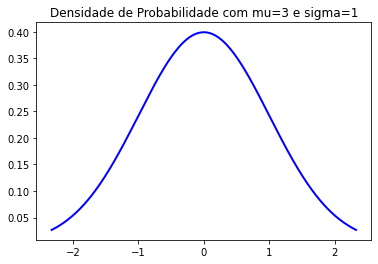

In [ ]:
### Normal com mu=3 e sigma=1

# Definição das variáveis
fig, ax = plt.subplots(1, 1)
dist = stats.norm
mu, sigma = 0, 1

# Valores mostrados
densidade = dist.pdf(2, mu, sigma)
cumulativa = dist.cdf(2, mu, sigma)
quantil = dist.ppf(0.15, mu, sigma)
var_aleatoria = dist.rvs(mu, sigma, size=8, random_state=None)

print('Densidade em x=2:', densidade)
print('\nCumulativa em x=2:', cumulativa, f'--> {round(cumulativa*100, 2)}% de chance de sair NO MÁXIMO 2')
print('\nQuantil com P=0.15:', quantil, f'--> valor associado a 15% de probabilidade cumulativa, ou seja, 15% de chance de sair NO MÁXIMO {quantil}')
print('\n8 Números Aleatórios:', var_aleatoria, '--> amostras aleatórias da distribuição\n')

# 1000 Valores igualmente espaçados entre os quantis 0,01 e 0,99
x = np.linspace(dist.ppf(0.01, mu, sigma),
                dist.ppf(0.99, mu, sigma), 1000)

# Plot da densidade de probabilidade
ax.plot(x, dist.pdf(x, mu, sigma), 'b-', lw=2)
ax.set_title('Densidade de Probabilidade com mu=3 e sigma=1')

plt.show()

### Log-Normal (Single-tailed fat-tail)

Densidade em x=10: 1.9804773299183516e-06

Cumulativa em x=10: 0.9999979393566041 --> 100.0% de chance de sair NO MÁXIMO 10

Quantil com P=0.15: 0.595581705489135 --> valor associado a 15% de probabilidade cumulativa, ou seja, 15% de chance de sair NO MÁXIMO 0.595581705489135

9 Números Aleatórios: [0.92197925 2.71134867 0.57406904 1.35584248 1.44234877 1.05212777
 0.99638836 0.77997673 2.44639866] --> amostras aleatórias da distribuição



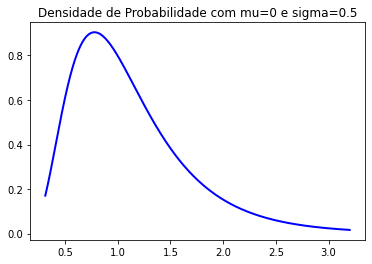

In [ ]:
### Log-Normal com mu=2 e sigma=0.5

# Definição das variáveis
fig, ax = plt.subplots(1, 1)
dist = stats.lognorm
mu, sigma = 0, 0.5

# Valores mostrados
densidade = dist.pdf(10, sigma, scale=np.exp(mu))
cumulativa = dist.cdf(10, sigma, scale=np.exp(mu))
quantil = dist.ppf(0.15, sigma, scale=np.exp(mu))
var_aleatoria = dist.rvs(sigma, scale=np.exp(mu), size=9, random_state=None)

print('Densidade em x=10:', densidade)
print('\nCumulativa em x=10:', cumulativa, f'--> {round(cumulativa*100, 2)}% de chance de sair NO MÁXIMO 10')
print('\nQuantil com P=0.15:', quantil, f'--> valor associado a 15% de probabilidade cumulativa, ou seja, 15% de chance de sair NO MÁXIMO {quantil}')
print('\n9 Números Aleatórios:', var_aleatoria, '--> amostras aleatórias da distribuição\n')

# 1000 Valores igualmente espaçados entre os quantis 0,01 e 0,99
x = np.linspace(dist.ppf(0.01, sigma, scale=np.exp(mu)),
                dist.ppf(0.99, sigma, scale=np.exp(mu)), 1000)

# Plot da densidade de probabilidade
ax.plot(x, dist.pdf(x, sigma, scale=np.exp(mu)), 'b-', lw=2)
ax.set_title('Densidade de Probabilidade com mu=0 e sigma=0.5')

plt.show()

### Student t / Cauchy (Double-tailed fat-tail)

Densidade em x=1: 0.23540239597638082

Cumulativa em x=1: 0.8347175343609079 --> 83.47% de chance de sair NO MÁXIMO 1

Quantil com P=0.15: -1.0671695155355512 --> valor associado a 15% de probabilidade cumulativa, ou seja, 15% de chance de sair NO MÁXIMO -1.0671695155355512

9 Números Aleatórios: [ 1.31024064 -0.69654254 -0.21505419  0.43715212 -0.80306822  1.54996635
 -0.32476164  0.41017959  1.65278622] --> amostras aleatórias da distribuição



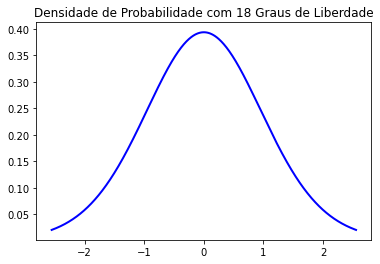

In [ ]:
### t com 18 Graus de Liberdade

# Definição das variáveis
fig, ax = plt.subplots(1, 1)
dist = stats.t
g = 18

# Valores mostrados
densidade = dist.pdf(1, g)
cumulativa = dist.cdf(1, g)
quantil = dist.ppf(0.15, g)
var_aleatoria = dist.rvs(g, size=9, random_state=None)

print('Densidade em x=1:', densidade)
print('\nCumulativa em x=1:', cumulativa, f'--> {round(cumulativa*100, 2)}% de chance de sair NO MÁXIMO 1')
print('\nQuantil com P=0.15:', quantil, f'--> valor associado a 15% de probabilidade cumulativa, ou seja, 15% de chance de sair NO MÁXIMO {quantil}')
print('\n9 Números Aleatórios:', var_aleatoria, '--> amostras aleatórias da distribuição\n')

# 1000 Valores igualmente espaçados entre os quantis 0,01 e 0,99
x = np.linspace(dist.ppf(0.01, g),
                dist.ppf(0.99, g), 1000) # Para Visualizar o plot completo, aumento o alcance das variáveis

# Plot da densidade de probabilidade
ax.plot(x, dist.pdf(x, g), 'b-', lw=2)
ax.set_title('Densidade de Probabilidade com 18 Graus de Liberdade')

plt.show()

Densidade em x=1: 0.15915494309189535

Cumulativa em x=1: 0.75 --> 75.0% de chance de sair NO MÁXIMO 1

Quantil com P=0.15: -1.9626105055051504 --> valor associado a 15% de probabilidade cumulativa, ou seja, 15% de chance de sair NO MÁXIMO -1.9626105055051504

9 Números Aleatórios: [-3.77334683e-02  1.13936208e+02  3.37231648e+00  5.11007209e-01
 -2.67984267e-01 -1.14709604e+00 -6.61006374e-01 -2.10818229e-01
 -7.46359508e-01] --> amostras aleatórias da distribuição



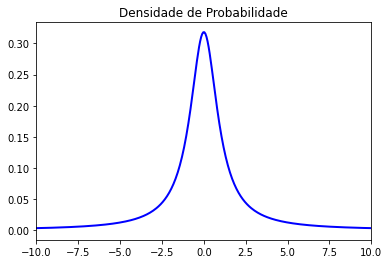

In [ ]:
### Cauchy --> t com g=1

# Definição das variáveis
fig, ax = plt.subplots(1, 1)
dist = stats.cauchy


# Valores mostrados
densidade = dist.pdf(1)
cumulativa = dist.cdf(1)
quantil = dist.ppf(0.15)
var_aleatoria = dist.rvs(size=9, random_state=None)

print('Densidade em x=1:', densidade)
print('\nCumulativa em x=1:', cumulativa, f'--> {round(cumulativa*100, 2)}% de chance de sair NO MÁXIMO 1')
print('\nQuantil com P=0.15:', quantil, f'--> valor associado a 15% de probabilidade cumulativa, ou seja, 15% de chance de sair NO MÁXIMO {quantil}')
print('\n9 Números Aleatórios:', var_aleatoria, '--> amostras aleatórias da distribuição\n')

# 1000 Valores igualmente espaçados entre os quantis 0,01 e 0,99
x = np.linspace(dist.ppf(0.01),
                dist.ppf(0.99), 1000)

# Plot da densidade de probabilidade
ax.plot(x, dist.pdf(x), 'b-', lw=2)
ax.set_title('Densidade de Probabilidade')
plt.xlim([-10,10])
plt.show()

### Variable Transformation: Non-Central Student t

Densidade em x=2: 0.36681155335346843

Cumulativa em x=2: 0.4862227139535008 --> 48.62% de chance de sair NO MÁXIMO 2

Quantil com P=0.15: 0.9638561582406618 --> valor associado a 15% de probabilidade cumulativa, ou seja, 15% de chance de sair NO MÁXIMO 0.9638561582406618

8 Números Aleatórios: [3.64047211 1.62823416 4.84910014 2.87094761 1.84584961 3.44712875
 2.86892113 3.12097713] --> amostras aleatórias da distribuição



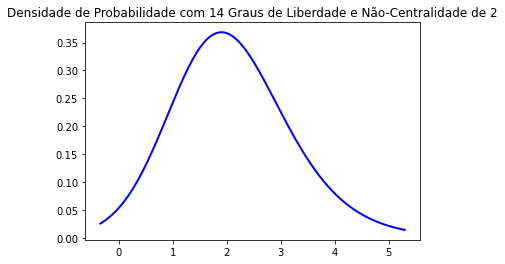

In [ ]:
### t Não Central com 14 Graus de Liberdade e Não-Centralidade de 2

# Definição das variáveis
fig, ax = plt.subplots(1, 1)
dist = stats.nct
g, nc = 14, 2

# Valores mostrados
densidade = dist.pdf(2, g, nc)
cumulativa = dist.cdf(2, g, nc)
quantil = dist.ppf(0.15, g, nc)
var_aleatoria = dist.rvs(g, nc, size=8, random_state=None)

print('Densidade em x=2:', densidade)
print('\nCumulativa em x=2:', cumulativa, f'--> {round(cumulativa*100, 2)}% de chance de sair NO MÁXIMO 2')
print('\nQuantil com P=0.15:', quantil, f'--> valor associado a 15% de probabilidade cumulativa, ou seja, 15% de chance de sair NO MÁXIMO {quantil}')
print('\n8 Números Aleatórios:', var_aleatoria, '--> amostras aleatórias da distribuição\n')

# 1000 Valores igualmente espaçados entre os quantis 0,01 e 0,99
x = np.linspace(dist.ppf(0.01, g, nc),
                dist.ppf(0.99, g, nc), 1000)

# Plot da densidade de probabilidade
ax.plot(x, dist.pdf(x, g, nc), 'b-', lw=2)
ax.set_title('Densidade de Probabilidade com 14 Graus de Liberdade e Não-Centralidade de 2')
plt.show()

### Seminormal / Assymetric Normal

Densidade em x=2: 0.10798193302637613

Cumulativa em x=2: 0.9544997361036416 --> 95.45% de chance de sair NO MÁXIMO 2

Quantil com P=0.15: 0.18911842627279238 --> valor associado a 15% de probabilidade cumulativa, ou seja, 15% de chance de sair NO MÁXIMO 0.18911842627279238

8 Números Aleatórios: [1.02744196 1.04388273 1.80756517 0.63485404 0.61506266 1.97525717
 0.35635014 0.75492737] --> amostras aleatórias da distribuição



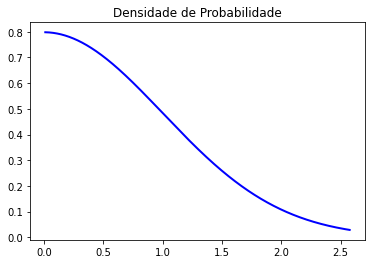

In [ ]:
### Seminormal

# Definição das variáveis
fig, ax = plt.subplots(1, 1)
dist = stats.halfnorm


# Valores mostrados
densidade = dist.pdf(2)
cumulativa = dist.cdf(2)
quantil = dist.ppf(0.15)
var_aleatoria = dist.rvs(size=8, random_state=None)

print('Densidade em x=2:', densidade)
print('\nCumulativa em x=2:', cumulativa, f'--> {round(cumulativa*100, 2)}% de chance de sair NO MÁXIMO 2')
print('\nQuantil com P=0.15:', quantil, f'--> valor associado a 15% de probabilidade cumulativa, ou seja, 15% de chance de sair NO MÁXIMO {quantil}')
print('\n8 Números Aleatórios:', var_aleatoria, '--> amostras aleatórias da distribuição\n')

# 1000 Valores igualmente espaçados entre os quantis 0,01 e 0,99
x = np.linspace(dist.ppf(0.01),
                dist.ppf(0.99), 1000)

# Plot da densidade de probabilidade
ax.plot(x, dist.pdf(x), 'b-', lw=2)
ax.set_title('Densidade de Probabilidade')

plt.show()

Densidade em x=1: 0.48392612201162116

Cumulativa em x=1: 0.6826903101061198 --> 68.27% de chance de sair NO MÁXIMO 1

Quantil com P=0.15: 0.14749927340632485 --> valor associado a 15% de probabilidade cumulativa, ou seja, 15% de chance de sair NO MÁXIMO 0.14749927340632485

9 Números Aleatórios: [1.34224274 1.02260217 0.6791597  0.67547014 0.76589127 0.21566655
 1.52520853 0.83967565 0.31600465] --> amostras aleatórias da distribuição



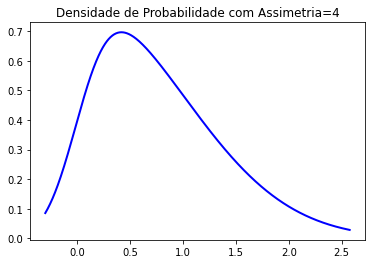

In [ ]:
### Normal Assimétrica com Assimetria=4

# Definição das variáveis
fig, ax = plt.subplots(1, 1)
dist = stats.skewnorm
a = 4

# Valores mostrados
densidade = dist.pdf(1, a)
cumulativa = dist.cdf(1, a)
quantil = dist.ppf(0.15, a)
var_aleatoria = dist.rvs(a, size=9, random_state=None)

print('Densidade em x=1:', densidade)
print('\nCumulativa em x=1:', cumulativa, f'--> {round(cumulativa*100, 2)}% de chance de sair NO MÁXIMO 1')
print('\nQuantil com P=0.15:', quantil, f'--> valor associado a 15% de probabilidade cumulativa, ou seja, 15% de chance de sair NO MÁXIMO {quantil}')
print('\n9 Números Aleatórios:', var_aleatoria, '--> amostras aleatórias da distribuição\n')

# 1000 Valores igualmente espaçados entre os quantis 0,01 e 0,99
x = np.linspace(dist.ppf(0.01, a),
                dist.ppf(0.99, a), 1000)

# Plot da densidade de probabilidade
ax.plot(x, dist.pdf(x, a), 'b-', lw=2)
ax.set_title('Densidade de Probabilidade com Assimetria=4')

plt.show()

### Laplace

Densidade em x=1: 0.18393972058572117

Cumulativa em x=1: 0.8160602794142788 --> 81.61% de chance de sair NO MÁXIMO 1

Quantil com P=0.15: -1.2039728043259361 --> valor associado a 15% de probabilidade cumulativa, ou seja, 15% de chance de sair NO MÁXIMO -1.2039728043259361

9 Números Aleatórios: [-1.50632839 -1.52876968 -0.21346     1.41307084 -0.61397032  0.11419197
 -0.0904619  -1.99642421 -0.24933817] --> amostras aleatórias da distribuição



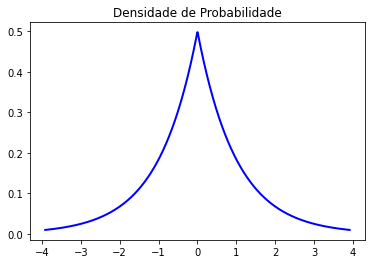

In [ ]:
### Laplace

# Definição das variáveis
fig, ax = plt.subplots(1, 1)
dist = stats.laplace


# Valores mostrados
densidade = dist.pdf(1)
cumulativa = dist.cdf(1)
quantil = dist.ppf(0.15)
var_aleatoria = dist.rvs(size=9, random_state=None)

print('Densidade em x=1:', densidade)
print('\nCumulativa em x=1:', cumulativa, f'--> {round(cumulativa*100, 2)}% de chance de sair NO MÁXIMO 1')
print('\nQuantil com P=0.15:', quantil, f'--> valor associado a 15% de probabilidade cumulativa, ou seja, 15% de chance de sair NO MÁXIMO {quantil}')
print('\n9 Números Aleatórios:', var_aleatoria, '--> amostras aleatórias da distribuição\n')

# 1000 Valores igualmente espaçados entre os quantis 0,01 e 0,99
x = np.linspace(dist.ppf(0.01),
                dist.ppf(0.99), 1000)

# Plot da densidade de probabilidade
ax.plot(x, dist.pdf(x), 'b-', lw=2)
ax.set_title('Densidade de Probabilidade')
plt.show()

# Multivariate Distribution

### Multinomial (Discrete)

Densidade em x=2 e y=3: [0. 0.]
8 Vetores Aleatórios: [[ 4 21]
 [ 7 18]
 [ 3 22]
 [ 4 21]
 [ 6 19]
 [ 4 21]
 [ 6 19]
 [ 2 23]] --> amostras aleatórias da distribuição



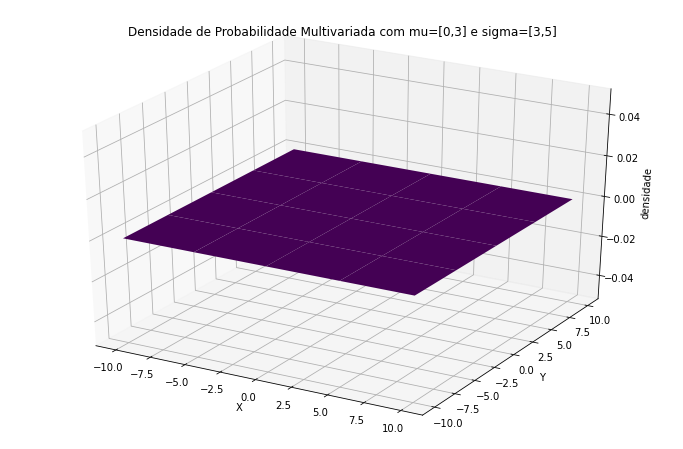

In [ ]:
### Multinomial com mu=2.5 e matriz de covariâncias=0.5

# Definição das variáveis
dist = stats.multinomial

mu_x = 25
sigma_x = 0.2
mu_y = 3
sigma_y = 0.8

# Valores mostrados
densidade = dist.pmf([[3, 4], [3, 5]], n=[mu_x, mu_y], p=[sigma_x, sigma_y])
#cumulativa = dist.cdf([2,3], mu_x, [sigma_x, sigma_y])
var_aleatoria = dist.rvs(n=mu_x, p=[sigma_x, sigma_y], size=8, random_state=None)

print('Densidade em x=2 e y=3:', densidade)
#print('Cumulativa em x=2 e y=3:', cumulativa, f'--> {round(cumulativa*100, 2)}% de chance de sair NO MÁXIMO X=2 e Y=3')
print('8 Vetores Aleatórios:', var_aleatoria, '--> amostras aleatórias da distribuição\n')

# Valores igualmente espaçados
x = np.linspace(-10,10,5)
y = np.linspace(-10,10,5)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = dist(mu_x, [.4, .6])

# #Plot das Curvas de Nível
# fig1 = plt.figure(figsize=[8,5])
# ax1 = fig1.add_subplot(111)
# ax1.set_title('Curvas de Nível com mu=[0,3] e sigma=[3,5]')
# ax1.contourf(x, y, rv.pmf(pos))

# Plot da Densidade Multivariada
fig2 = plt.figure(figsize=[12,8])
ax2 = fig2.gca(projection='3d')
ax2.plot_surface(X, Y, rv.pmf(pos),cmap='viridis',linewidth=0)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('densidade')
ax2.set_title('Densidade de Probabilidade Multivariada com mu=[0,3] e sigma=[3,5]')
plt.show()

# Ignorando avisos do matplotlib
warnings.filterwarnings("ignore")

### Multivariate Normal (Continuous)

Densidade em x=2 e y=3: 0.02109817292192945
Cumulativa em x=2 e y=3: 0.4379467302525191 --> 43.79% de chance de sair NO MÁXIMO X=2 e Y=3
8 Vetores Aleatórios: [[ 0.08280888  0.68523914]
 [ 0.31232879 -0.76426378]
 [-0.16208931  5.25065606]
 [ 1.57609707  1.39224528]
 [-1.27187111  0.56822986]
 [-0.03325465  3.89934315]
 [ 0.14718684  1.38107459]
 [ 0.21950028  2.11630673]] --> amostras aleatórias da distribuição



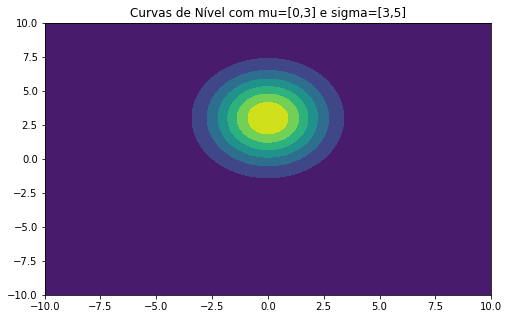

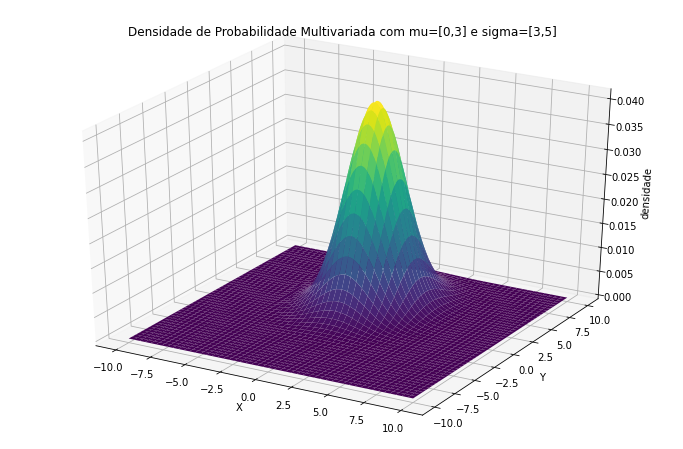

In [ ]:
### Normal Multivariada com mu=2.5 e matriz de covariâncias=0.5

# Definição das variáveis
dist = stats.multivariate_normal

mu_x = 0
sigma_x = 3
mu_y = 3
sigma_y = 5

# Valores mostrados
densidade = dist.pdf([2,3], [mu_x, mu_y], [sigma_x, sigma_y])
cumulativa = dist.cdf([2,3], [mu_x, mu_y], [sigma_x, sigma_y])
var_aleatoria = dist.rvs([mu_x, mu_y], [sigma_x, sigma_y], size=8, random_state=None)

print('Densidade em x=2 e y=3:', densidade)
print('Cumulativa em x=2 e y=3:', cumulativa, f'--> {round(cumulativa*100, 2)}% de chance de sair NO MÁXIMO X=2 e Y=3')
print('8 Vetores Aleatórios:', var_aleatoria, '--> amostras aleatórias da distribuição\n')

# Valores igualmente espaçados
x = np.linspace(-10,10,500)
y = np.linspace(-10,10,500)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = dist([mu_x, mu_y], [[sigma_x, 0], [0, sigma_y]])

# Plot das Curvas de Nível
fig1 = plt.figure(figsize=[8,5])
ax1 = fig1.add_subplot(111)
ax1.set_title('Curvas de Nível com mu=[0,3] e sigma=[3,5]')
ax1.contourf(x, y, rv.pdf(pos))

# Plot da Densidade Multivariada
fig2 = plt.figure(figsize=[12,8])
ax2 = fig2.gca(projection='3d')
ax2.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('densidade')
ax2.set_title('Densidade de Probabilidade Multivariada com mu=[0,3] e sigma=[3,5]')
plt.show()

# Ignorando avisos do matplotlib
warnings.filterwarnings("ignore")

### Dirichlet (Continuous)

Densidade em x=2 e y=3: 0.02109817292192945
Cumulativa em x=2 e y=3: 0.4379467302525191 --> 43.79% de chance de sair NO MÁXIMO X=2 e Y=3
8 Vetores Aleatórios: [[-1.29958298  5.84348504]
 [ 0.48706119  0.97995521]
 [-2.26644678  0.13148666]
 [-1.00999514  1.04748869]
 [ 0.97338875  1.57236996]
 [-0.35007561  9.48959266]
 [-0.49408329 -0.92247551]
 [ 0.75786547  4.19460623]] --> amostras aleatórias da distribuição



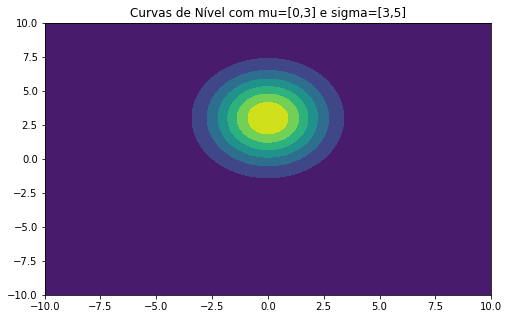

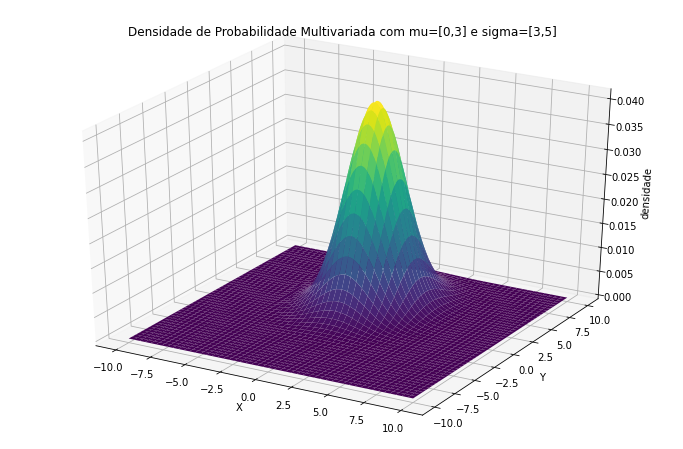

In [ ]:
### Normal Multivariada com mu=2.5 e matriz de covariâncias=0.5

# Definição das variáveis
dist = stats.multivariate_normal

mu_x = 0
sigma_x = 3
mu_y = 3
sigma_y = 5

# Valores mostrados
densidade = dist.pdf([2,3], [mu_x, mu_y], [sigma_x, sigma_y])
cumulativa = dist.cdf([2,3], [mu_x, mu_y], [sigma_x, sigma_y])
var_aleatoria = dist.rvs([mu_x, mu_y], [sigma_x, sigma_y], size=8, random_state=None)

print('Densidade em x=2 e y=3:', densidade)
print('Cumulativa em x=2 e y=3:', cumulativa, f'--> {round(cumulativa*100, 2)}% de chance de sair NO MÁXIMO X=2 e Y=3')
print('8 Vetores Aleatórios:', var_aleatoria, '--> amostras aleatórias da distribuição\n')

# Valores igualmente espaçados
x = np.linspace(-10,10,500)
y = np.linspace(-10,10,500)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = dist([mu_x, mu_y], [[sigma_x, 0], [0, sigma_y]])

# Plot das Curvas de Nível
fig1 = plt.figure(figsize=[8,5])
ax1 = fig1.add_subplot(111)
ax1.set_title('Curvas de Nível com mu=[0,3] e sigma=[3,5]')
ax1.contourf(x, y, rv.pdf(pos))

# Plot da Densidade Multivariada
fig2 = plt.figure(figsize=[12,8])
ax2 = fig2.gca(projection='3d')
ax2.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('densidade')
ax2.set_title('Densidade de Probabilidade Multivariada com mu=[0,3] e sigma=[3,5]')
plt.show()

# Ignorando avisos do matplotlib
warnings.filterwarnings("ignore")